In [1]:
import nbimporter
import functions as func
import networkx as nx
import konect2networkx as k2n
import pickle
from pathlib import Path

In [2]:
def generate_ust_plot(name, n, colormap = False, with_node_labels = False, with_edge_labels = True, edge_font_size = 10,with_zero_edges = True, edge_threshold = 0.0,fig_width = 12, fig_height = 10, pos = []):
  print("Hálózat beolvasása\n")
  G = func.network_graph(name)
  
  if (name[len(name) - 4:] == ".mtx"):
    name = name[:len(name) - 4]

  try:
    my_file = Path("pickle/" + name + "_normalized_" + str(n) + ".ls")
    if my_file.is_file():
      normalized = pickle.load(open("pickle/" + name + "_normalized_" + str(n) + ".ls","rb"))
    else:
      print("\nÉlek tömbbé alakítása")
      matrix = func.ust_matrix(G, n)
      print("\nÉlsúlyok normalizálása")
      normalized = func.ust_normalized(matrix)
      pickle.dump(normalized,open("pickle/" + name + "_normalized_" + str(n) + ".ls","wb"))
    print("\nÉlek színezése ", n, " random generált feszítőfa segítségével:")
    curr_pos = func.draw_normalized(normalized, colormap, with_node_labels, with_edge_labels, edge_font_size, with_zero_edges, edge_threshold, fig_width, fig_height, pos)
    return curr_pos
  except:
    print("Nem sikerült az ust-k megjelenítése.")

In [3]:
def generate_edge_betw_plot(name, colormap = False, with_node_labels = False, with_edge_labels = True, edge_font_size = 10, with_zero_edges = True, edge_threshold = 0.0,fig_width = 12, fig_height = 10, pos = []):
  print("Hálózat beolvasása:")
  G = func.network_graph(name)
  print("\nBetweenness centrality számolása")
  res = nx.edge_betweenness_centrality(G)

  try:
    print("\nÉlek színezése edge betweenness segítségével:")
    curr_pos = func.draw_normalized(res, colormap, with_node_labels, with_edge_labels, edge_font_size, with_zero_edges, edge_threshold, fig_width, fig_height, pos)
    return curr_pos
  except:
    print("Nem sikerült az edge betweenness megjelenítése.")

In [4]:
def all_plot(name, n, ust = True, edge_betw = True, colormap = False, with_node_labels = False, with_edge_labels = True, edge_font_size = 10,with_zero_edges = True, fig_width = 12, fig_height = 10):
  if(ust):
    pos = generate_ust_plot(name, n, colormap, with_node_labels, with_edge_labels, edge_font_size,with_zero_edges, fig_width, fig_height)
  
  if(edge_betw):
    generate_edge_betw_plot(name, colormap, with_node_labels, with_edge_labels, edge_font_size,with_zero_edges, fig_width, fig_height, pos)

<hr>

# Ábrák

### Zachary karate club

- **social network**
- csúcsok száma: **34**
- élek száma: **78**
- forrás: http://konect.cc/networks/ucidata-zachary/

Hálózat beolvasása

[KONECT2NetworkX] Attemping to download network to ucidata-zachary.tar.bz2
[KONECT2NetworkX] HTTP request successful, writing network to ucidata-zachary.tar.bz2
[KONECT2NetworkX] Network successfully unpacked!

Élek tömbbé alakítása

Élsúlyok normalizálása

Élek színezése  300  random generált feszítőfa segítségével:


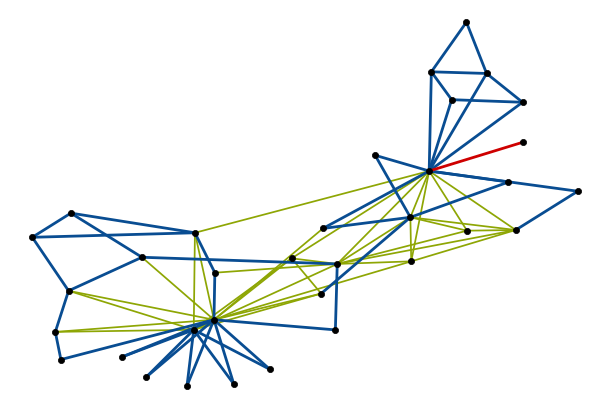

In [18]:
pos1 = generate_ust_plot('ucidata-zachary', 300, with_edge_labels= False, fig_width=12, fig_height=8)
#pos1 = generate_ust_plot('ucidata-zachary', 300, with_edge_labels= False, fig_width=12, fig_height=8, pos=pos1)

Hálózat beolvasása

[KONECT2NetworkX] Attemping to download network to ucidata-zachary.tar.bz2
[KONECT2NetworkX] HTTP request successful, writing network to ucidata-zachary.tar.bz2
[KONECT2NetworkX] Network successfully unpacked!

Élek színezése  300  random generált feszítőfa segítségével:


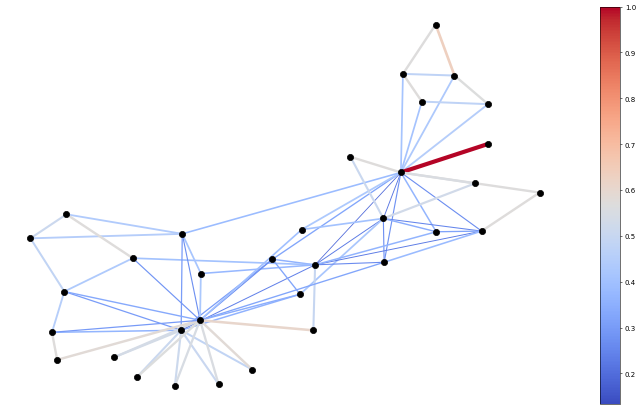

In [44]:
pos1 = generate_ust_plot('ucidata-zachary', 300, colormap=True, with_edge_labels= False, fig_width=12, fig_height=8, pos=pos1)

#### Edge betweenness : Zachary karate club

Hálózat beolvasása

[KONECT2NetworkX] Attemping to download network to ucidata-zachary.tar.bz2
[KONECT2NetworkX] HTTP request successful, writing network to ucidata-zachary.tar.bz2
[KONECT2NetworkX] Network successfully unpacked!

Betweenness centrality számolása

Élek színezése edge betweenness segítségével:


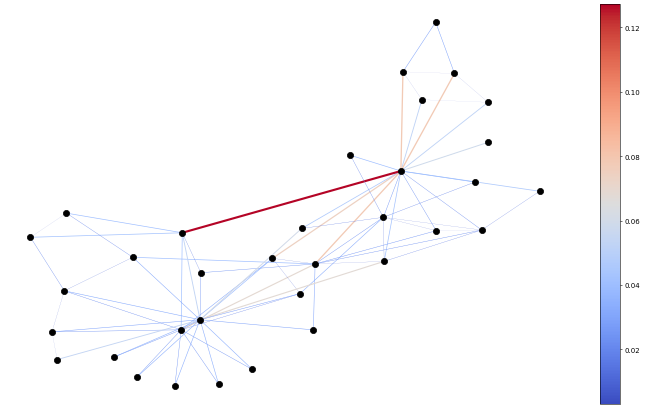

In [20]:
pos1 = generate_edge_betw_plot('ucidata-zachary', colormap=True, with_edge_labels= False, fig_width=12, fig_height=8, pos=pos1)

### USAIR97

- **infrastructure network**
- csúcsok száma: **332**
- élek száma: **2126**
- forrás: https://networkrepository.com/inf-USAir97.php

In [17]:
G = func.network_graph('inf-USAir97.mtx')

In [7]:
normalized = pickle.load(open("pickle/inf-USAir97_normalized_20.ls","rb"))

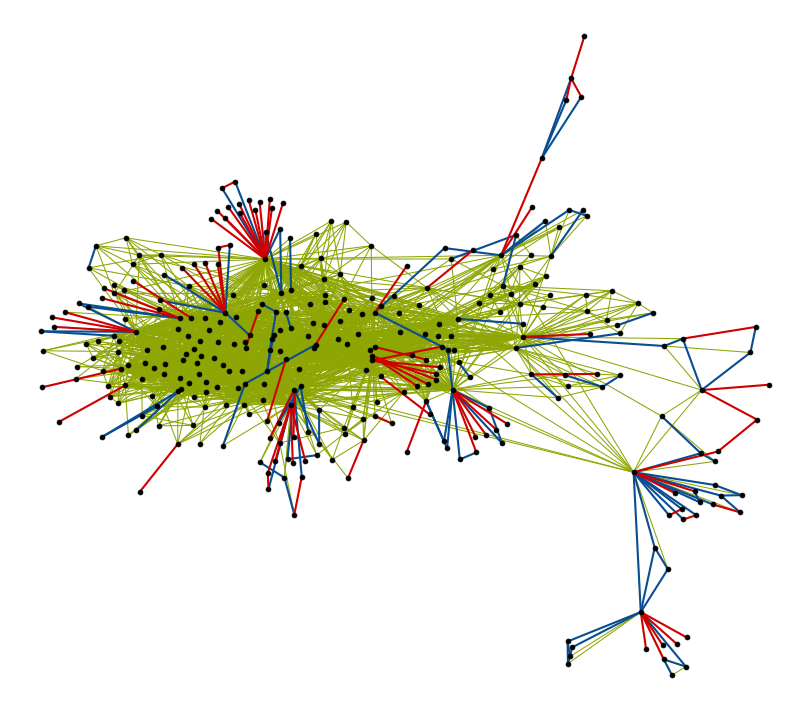

In [41]:
pos2 = func.draw_normalized(normalized, with_edge_labels= False, fig_width=16, fig_height=14)

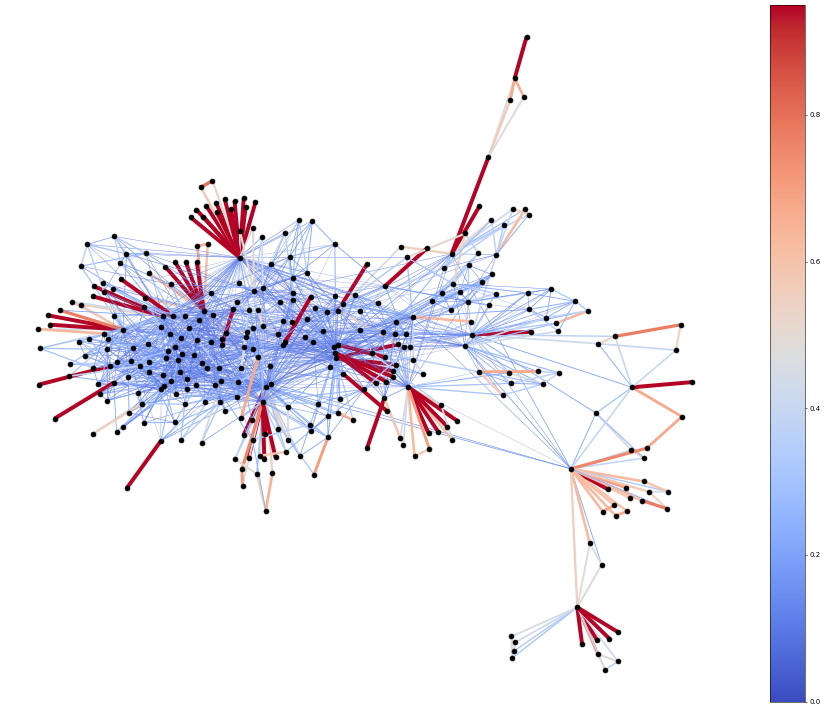

In [42]:
pos2 = func.draw_normalized(normalized, colormap=True, with_edge_labels= False, fig_width=16, fig_height=14, pos=pos2)

#### Edge betweenness : USAIR97

Hálózat beolvasása:

Betweenness centrality számolása

Élek színezése edge betweenness segítségével:


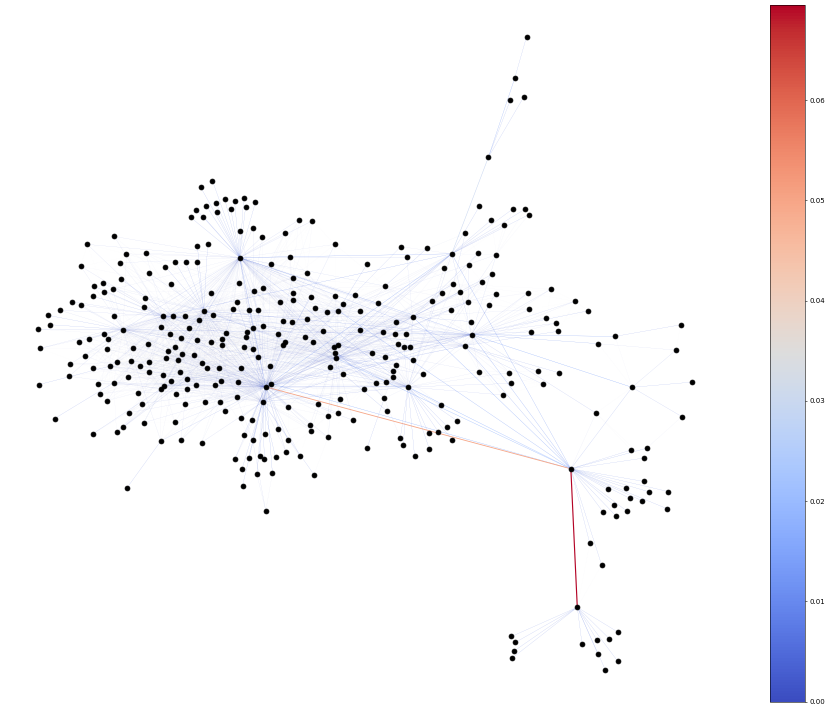

In [52]:
pos2 = generate_edge_betw_plot('inf-USAir97.mtx', colormap=True, with_edge_labels= False, fig_width=16, fig_height=14, pos=pos2)

Edge betweenness 0.005 értékű threshold-dal:<br>Azaz a megjelenítésben csak azokat az éleket vesszük figyelembe, melyek élsúlya nagyobb, mint 0.005

Hálózat beolvasása:

Betweenness centrality számolása

Élek színezése edge betweenness segítségével:


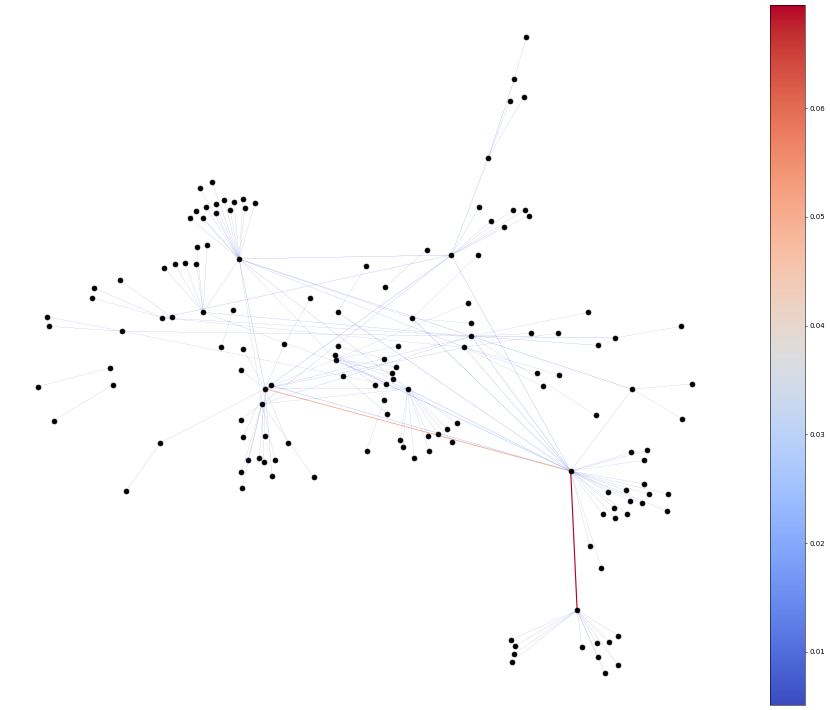

In [53]:
pos2 = generate_edge_betw_plot('inf-USAir97.mtx', colormap=True, with_edge_labels= False, edge_threshold=0.005, fig_width=16, fig_height=14, pos=pos2)

### FB-PAGES-FOOD

- **social network**
- csúcsok száma: **620**
- élek száma: **2102**
- csúcsok: Facebook oldalak
- desc: Data collected about Facebook pages (November 2017). These datasets represent blue verified Facebook page networks of different categories. Nodes represent the pages and edges are mutual likes among them.
- irányítatlan gráf, hurokélekkel
- forrás: https://networkrepository.com/fb-pages-food.php

In [8]:
G = func.network_graph("fb-pages-food.edges")

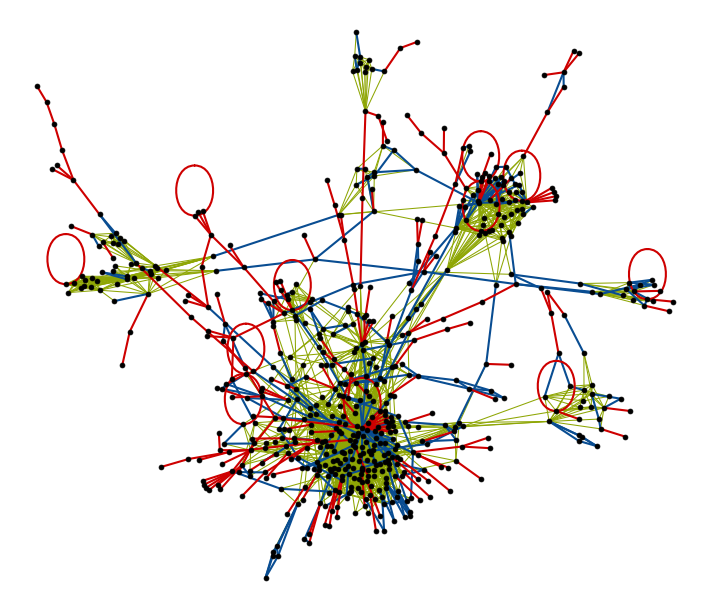

In [15]:
#matrix = func.ust_matrix(G, 50)
matrix = pickle.load(open("pickle/fb-pages-food_ust_50.ls","rb"))
normalized = func.ust_normalized(matrix)
pos3 = func.draw_normalized(normalized, with_node_labels = False, with_edge_labels=False, fig_height = 12, fig_width=14)

hurokélek nélkül:<br>
(2091 csúcs)

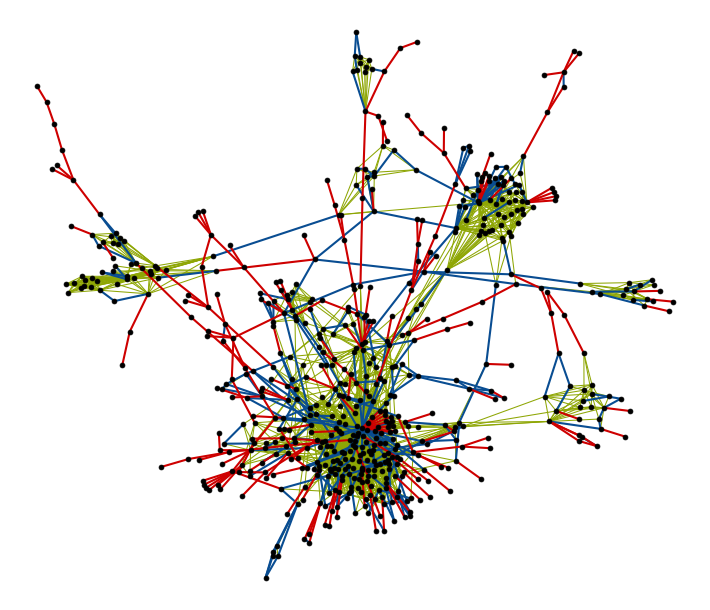

In [14]:
#G.remove_edges_from(nx.selfloop_edges(G))
#matrix = func.ust_matrix(G, 50)
matrix = pickle.load(open("pickle/fb-pages-food_ust_50_wo_loops.ls","rb"))
normalized = func.ust_normalized(matrix)
pos3 = func.draw_normalized(normalized, with_node_labels = False, with_edge_labels=False, fig_height = 12, fig_width=14, pos=pos3)

#### Edge betweenness : FB-PAGES-FOOD

Hálózat beolvasása:

Betweenness centrality számolása

Élek színezése edge betweenness segítségével:


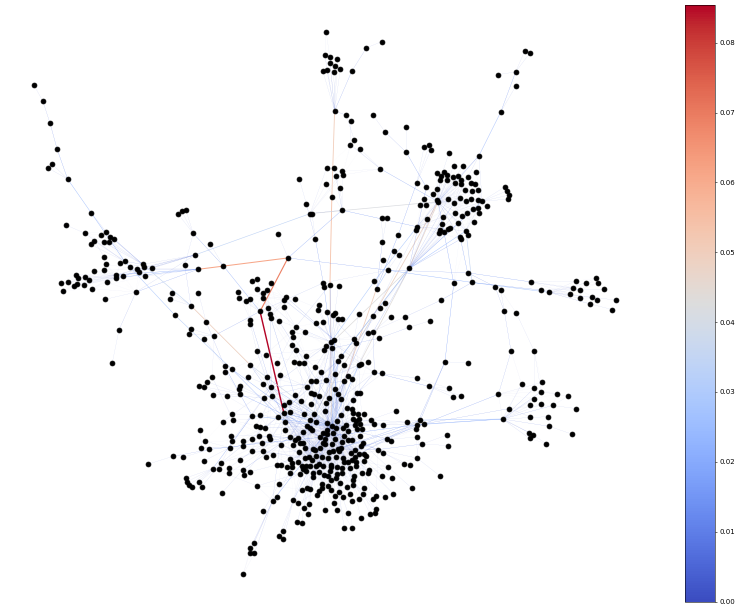

In [16]:
pos3 = generate_edge_betw_plot('fb-pages-food.edges', colormap=True, with_edge_labels= False, fig_height = 12, fig_width=14, pos=pos3)